In [ ]:
import numpy as np

from cleanplots import *
import sys
sys.path.append('/home/lakabuli/workspace/LenslessInfoDesign/EncodingInformation/lensless_imager/')
from lensless_helpers import *

In [2]:
diffuser_psf = load_diffuser_32()
aperture_psf = np.copy(diffuser_psf)
aperture_psf[:5] = 0
aperture_psf[-5:] = 0
aperture_psf[:,:5] = 0
aperture_psf[:,-5:] = 0
aperture_psf_2 = np.copy(diffuser_psf)
aperture_psf_2[:2] = 0
aperture_psf_2[-2:] = 0
aperture_psf_2[:,:2] = 0
aperture_psf_2[:,-2:] = 0

aperture_psf_8 = np.copy(diffuser_psf)
aperture_psf_8[:8] = 0
aperture_psf_8[-8:] = 0
aperture_psf_8[:,:8] = 0
aperture_psf_8[:,-8:] = 0

aperture_psf_10 = np.copy(diffuser_psf)
aperture_psf_10[:10] = 0
aperture_psf_10[-10:] = 0
aperture_psf_10[:,:10] = 0
aperture_psf_10[:,-10:] = 0

aperture_psf_12 = np.copy(diffuser_psf)
aperture_psf_12[:12] = 0
aperture_psf_12[-12:] = 0
aperture_psf_12[:,:12] = 0
aperture_psf_12[:,-12:] = 0

aperture_psf_14 = np.copy(diffuser_psf)
aperture_psf_14[:14] = 0
aperture_psf_14[-14:] = 0
aperture_psf_14[:,:14] = 0
aperture_psf_14[:,-14:] = 0

In [ ]:
# set eligible psfs
psf_patterns = [diffuser_psf, aperture_psf_2, aperture_psf, aperture_psf_8, aperture_psf_10, aperture_psf_12, aperture_psf_14]
psf_names = ['diffuser', 'aperture_2', 'aperture', 'aperture_8', 'aperture_10', 'aperture_12', 'aperture_14']
psf_names_nice = ['Huge Diffuser', 'Aperture 2', 'Aperture 5', 'Aperture 8', 'Aperture 10', 'Aperture 12', 'Aperture 14']

psf_patterns = [diffuser_psf, aperture_psf_2, aperture_psf_8, aperture_psf_10, aperture_psf_12] 
psf_names = ['diffuser', 'aperture_2', 'aperture_8', 'aperture_10', 'aperture_12']
psf_names_nice = ['Huge Diffuser', 'Large Diffuser', 'Medium Diffuser', 'Small Diffuser', 'Tiny Diffuser']

# set eligible bead sparsity levels
sparsity_levels = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05]
# set dataset size 
num_x = 96
num_y = 96
num_bead_imgs = 50000
# MI estimator parameters 
patch_size = 32
num_patches = 10000
val_set_size = 1000
test_set_size = 1500 
num_samples = 8
learning_rate = 1e-3
num_iters_per_epoch = 500
patience_val = 20
mean_photon_count = 100 

In [ ]:
figure_dir = '/home/lakabuli/workspace/LenslessInfoDesign/figures/'

### Load Object TCs - use full object TCs

In [ ]:
tc_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/tc_values/bead_tc_values/'

{'full': [2.3220048, 0.031725116], 'crop': [2.1282728, 0.65259206]}
{'full': [1.9483995, 0.024381442], 'crop': [2.0181088, 0.4365793]}
{'full': [1.7573276, 0.021689808], 'crop': [1.8271847, 0.32880318]}
{'full': [1.6325746, 0.02006286], 'crop': [1.6809939, 0.25866053]}
{'full': [1.5324417, 0.018794259], 'crop': [1.5632814, 0.20561369]}
{'full': [1.46307, 0.017978149], 'crop': [1.4836552, 0.1727258]}
{'full': [1.4063642, 0.01728814], 'crop': [1.4209187, 0.15110639]}
{'full': [1.3588215, 0.016813619], 'crop': [1.3685265, 0.13535927]}
{'full': [1.3179525, 0.016410327], 'crop': [1.3239619, 0.12261661]}
{'full': [1.278587, 0.01606197], 'crop': [1.2817489, 0.111764856]}
{'full': [1.2196074, 0.015450943], 'crop': [1.2193334, 0.09765958]}
{'full': [1.1944333, 0.015201833], 'crop': [1.1928512, 0.092288256]}
{'full': [1.1691554, 0.014943333], 'crop': [1.1667233, 0.087159514]}
{'full': [1.1484342, 0.0147269275], 'crop': [1.1453289, 0.083182015]}
{'full': [1.0641085, 0.013903436], 'crop': [1.05883

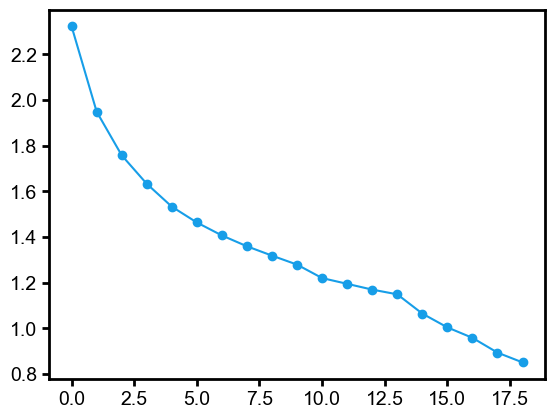

In [6]:
object_tcs = []
for sparsity in sparsity_levels: 
    object_path = tc_dir + 'tamura_values_object_{}_sparsity_{}_photons.npy'.format(sparsity, mean_photon_count)
    object_tc = np.load(object_path, allow_pickle=True).item()
    tamura_value = object_tc['full'][0]
    object_tcs.append(tamura_value)
    print(object_tc)
object_tcs = np.array(object_tcs)
plt.plot(object_tcs, '-o')

### Load Measurement TCs - use noisy patch TC

In [ ]:
tc_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/tc_values/bead_tc_values/'

In [8]:
sparsities_and_tcs = []
for sparsity in sparsity_levels:
    tc_across_psfs = [] 
    for psf in psf_names: 
        tc_path = tc_dir + 'tamura_values_{}_sparsity_{}_photons_{}_psf.npy'.format(sparsity, mean_photon_count, psf)
        tc = np.load(tc_path, allow_pickle=True).item()
        tc_value = tc['patch_noisy'][0] 
        print("TC value for sparsity {} and PSF {} is {}".format(sparsity, psf, tc_value))
        tc_across_psfs.append(tc_value)
    sparsities_and_tcs.append(tc_across_psfs)
sparsities_and_tcs = np.array(sparsities_and_tcs)

TC value for sparsity 0.001 and PSF diffuser is 0.9044682383537292
TC value for sparsity 0.001 and PSF aperture_2 is 0.9573383927345276
TC value for sparsity 0.001 and PSF aperture_8 is 1.1335521936416626
TC value for sparsity 0.001 and PSF aperture_10 is 1.1880130767822266
TC value for sparsity 0.001 and PSF aperture_12 is 1.122087836265564
TC value for sparsity 0.002 and PSF diffuser is 0.7900023460388184
TC value for sparsity 0.002 and PSF aperture_2 is 0.8197070360183716
TC value for sparsity 0.002 and PSF aperture_8 is 0.984183132648468
TC value for sparsity 0.002 and PSF aperture_10 is 1.0552300214767456
TC value for sparsity 0.002 and PSF aperture_12 is 1.0249587297439575
TC value for sparsity 0.003 and PSF diffuser is 0.7588791847229004
TC value for sparsity 0.003 and PSF aperture_2 is 0.7754749655723572
TC value for sparsity 0.003 and PSF aperture_8 is 0.895790696144104
TC value for sparsity 0.003 and PSF aperture_10 is 0.9617994427680969
TC value for sparsity 0.003 and PSF ap

### Load MI sweeps

In [ ]:
mi_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/mi_estimates/bead_mi_estimates/'

In [10]:
sparsities_and_mis = []
sparsities_and_lowers = []
sparsities_and_uppers = []
for sparsity in sparsity_levels:
    mi_across_psfs = []
    lowers_across_psfs = []
    uppers_across_psfs = []
    for psf in psf_names:
        mi_path = mi_dir + 'pixelcnn_mi_estimate_{}_sparsity_{}_photons_{}_psf_{}_lr_{}_patience_{}_steps_per_epoch.npy'.format(sparsity, mean_photon_count, psf, learning_rate, patience_val, num_iters_per_epoch)
        mi_estimates = np.load(mi_path)
        print('MI estimate for sparsity level {} and PSF {} is {}'.format(sparsity, psf, mi_estimates))
        best_mi_value, best_mi_idx = np.min(mi_estimates[0]), np.argmin(mi_estimates[0])
        best_mi_lower_bound = mi_estimates[1][best_mi_idx]
        best_mi_upper_bound = mi_estimates[2][best_mi_idx]
        mi_across_psfs.append(best_mi_value)
        lowers_across_psfs.append(best_mi_lower_bound)
        uppers_across_psfs.append(best_mi_upper_bound)
    sparsities_and_mis.append(mi_across_psfs)
    sparsities_and_lowers.append(lowers_across_psfs)
    sparsities_and_uppers.append(uppers_across_psfs)
sparsities_and_mis = np.array(sparsities_and_mis)
sparsities_and_lowers = np.array(sparsities_and_lowers)
sparsities_and_uppers = np.array(sparsities_and_uppers)

MI estimate for sparsity level 0.001 and PSF diffuser is [[0.21786377 0.23463919 0.21320301 0.25306529 0.24806037]
 [0.19116605 0.20152803 0.17924044 0.22150319 0.21389852]
 [0.2539049  0.27236293 0.24633143 0.28594988 0.28502386]]
MI estimate for sparsity level 0.001 and PSF aperture_2 is [[0.16644396 0.18062616 0.16168327 0.20032333 0.1909767 ]
 [0.14133025 0.14859283 0.1281022  0.16921646 0.15859096]
 [0.20048617 0.21593843 0.19300926 0.23305531 0.22616421]]
MI estimate for sparsity level 0.001 and PSF aperture_8 is [[0.05316207 0.05852691 0.04726033 0.07066956 0.06546927]
 [0.03918511 0.03924848 0.02711895 0.05090264 0.04772523]
 [0.07287713 0.078871   0.06621983 0.09183957 0.08663926]]
MI estimate for sparsity level 0.001 and PSF aperture_10 is [[0.03436511 0.03740796 0.03100167 0.04725213 0.04434813]
 [0.02426522 0.02335688 0.01709878 0.03367091 0.03221928]
 [0.04801623 0.05175469 0.04427007 0.06209579 0.05939265]]
MI estimate for sparsity level 0.001 and PSF aperture_12 is [[0.0

## Make actual figure with perceptual colormap, Fig. S3c

In [14]:
inferno = plt.cm.get_cmap('viridis', 7) # max photon count value, using each tick point smoothly gives a better color gradient that isn't uniform
colors = [inferno(i) for i in [1, 2, 3, 4, 5, 6, 7]]

axis_label_fontsize = 21
title_fontsize = 23
tick_fontsize = 19
legend_fontsize = 16
star_size = 18
error_bar_transparency = 0.15

/tmp/ipykernel_1243836/2318338476.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  inferno = plt.cm.get_cmap('viridis', 7) # max photon count value, using each tick point smoothly gives a better color gradient that isn't uniform


Sensor sparsity for PSF Huge Diffuser is 0.7588791847229004 and MI is 0.3745817928741298
Sensor sparsity for PSF Large Diffuser is 0.7577210664749146 and MI is 0.35031991035539145
Sensor sparsity for PSF Medium Diffuser is 0.7595783472061157 and MI is 0.2322066676719277
Sensor sparsity for PSF Small Diffuser is 0.760902464389801 and MI is 0.20118314634852263
Sensor sparsity for PSF Tiny Diffuser is 0.7561764717102051 and MI is 0.10279388587345019


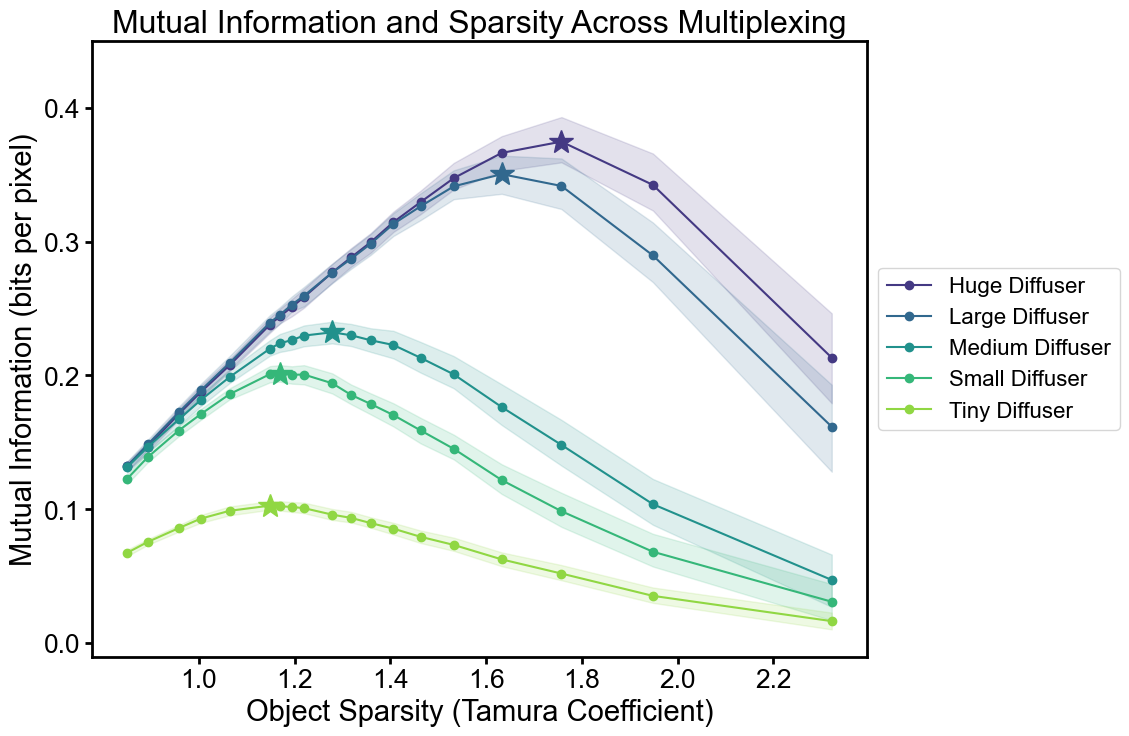

In [ ]:
plt.figure(figsize=(10, 8))
for psf_idx in range(len(psf_names)):
    plt.plot(object_tcs, sparsities_and_mis[:, psf_idx], '-o', label=psf_names_nice[psf_idx], color=colors[psf_idx])
    plt.fill_between(object_tcs, sparsities_and_lowers[:, psf_idx], sparsities_and_uppers[:, psf_idx], alpha=error_bar_transparency, color=colors[psf_idx])
    y_coord_idx = np.argmax(sparsities_and_mis[:, psf_idx])
    y_coord = sparsities_and_mis[y_coord_idx, psf_idx]
    x_coord = object_tcs[y_coord_idx]
    plt.plot(x_coord, y_coord, '*', color=colors[psf_idx], markersize=star_size)
    print("Sensor sparsity for PSF {} is {} and MI is {}".format(psf_names_nice[psf_idx], sparsities_and_tcs[y_coord_idx, psf_idx], y_coord))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=legend_fontsize)
plt.xlabel('Object Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.ylabel('Mutual Information (bits per pixel)', fontsize=axis_label_fontsize)
plt.ylim([-0.01, 0.45])
plt.xticks([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2], size=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.title("Mutual Information and Sparsity Across Multiplexing", size=title_fontsize)
plt.savefig(figure_dir + 'diffuser_mi_vs_sparsity_2D.pdf', transparent=True, bbox_inches='tight')

## Plot of Object Sparsity vs. Measurement TC: Fig. S3d

Sensor sparsity for PSF Huge Diffuser is 0.7588791847229004 and MI is 0.3745817928741298
Sensor sparsity for PSF Large Diffuser is 0.7577210664749146 and MI is 0.35031991035539145
Sensor sparsity for PSF Medium Diffuser is 0.7595783472061157 and MI is 0.2322066676719277
Sensor sparsity for PSF Small Diffuser is 0.760902464389801 and MI is 0.20118314634852263
Sensor sparsity for PSF Tiny Diffuser is 0.7561764717102051 and MI is 0.10279388587345019


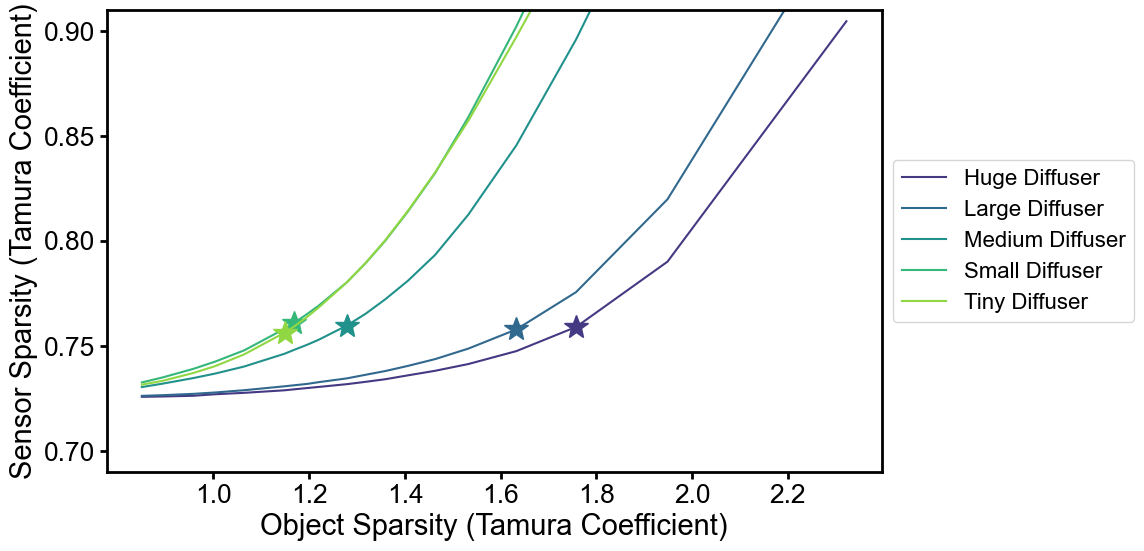

In [20]:
plt.figure(figsize=(10, 6))
# plot in terms of tamura 
for psf_idx in range(5):
    plt.plot(object_tcs, sparsities_and_tcs[:, psf_idx], label=psf_names_nice[psf_idx], color=colors[psf_idx])
    y_coord_idx = np.argmax(sparsities_and_mis[:, psf_idx])
    y_coord = sparsities_and_tcs[y_coord_idx, psf_idx]
    x_coord = object_tcs[y_coord_idx]
    plt.plot(x_coord, y_coord, '*', color=colors[psf_idx], markersize=star_size)
    print("Sensor sparsity for PSF {} is {} and MI is {}".format(psf_names_nice[psf_idx], y_coord, sparsities_and_mis[y_coord_idx, psf_idx]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=legend_fontsize)
plt.xlabel('Object Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.ylabel('Sensor Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.ylim([0.69, 0.91])
plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9],size=tick_fontsize)
plt.xticks([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2], size=tick_fontsize)
plt.savefig(figure_dir + 'diffuser_sensor_vs_object_sparsity_2D.pdf', transparent=True, bbox_inches='tight')

## Make target bead examples: Fig. S3b

In [22]:
num_bead_imgs_vis = 50

0.0 19468.795
0.0 2227.2256
0.0 952.83624


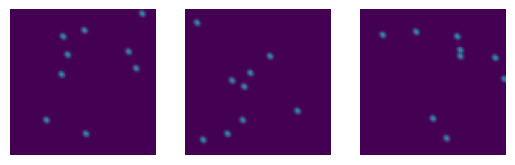

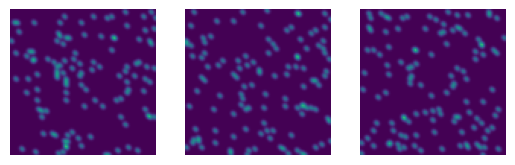

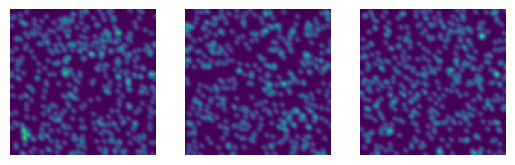

In [23]:
target_sparsities = [0.001, 0.013, 0.05] 
for sparsity in target_sparsities:
    dataset = np.zeros((num_bead_imgs_vis, num_x, num_y))
    for i in range(dataset.shape[0]):
        dataset[i], num_points = make_bead_volume(sparsity, bead_width_scale=1, numx=num_x, numy=num_y)
    dataset = dataset.astype(np.float32)
    dataset_photons = dataset / np.mean(dataset)
    dataset_photons = dataset_photons * mean_photon_count
    max_val = np.max(dataset_photons)
    min_val = np.min(dataset_photons)
    print(min_val, max_val)
    # put examples and show images 
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(dataset_photons[0], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(dataset_photons[1], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(dataset_photons[2], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.savefig(figure_dir + '{}_sparsity_bead_images.pdf'.format(sparsity), transparent=True, bbox_inches='tight')
    